<a href="https://colab.research.google.com/github/SMSinclair/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/Sinclair_LS_DS_Unit_4_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
import numpy as np

In [0]:
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

In [0]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
# looks like there are 46 categories
y_train.min(), y_train.max()

(0, 45)

In [0]:
from tensorflow import keras

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from tensorflow.keras.datasets import reuters

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# target encoding for softmax
y_train = keras.utils.to_categorical(y_train, num_classes=46)
y_test = keras.utils.to_categorical(y_test, num_classes=46)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/15


InvalidArgumentError: ignored

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [0]:
!pip install google_images_download

     |████████████████████████████████| 911kB 27.5MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=5ad5677e7b9b0a30af1d58a9ac9bcb7e957a0e697fa3ca3ae3fb36296a56f2e6
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 20, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 4.PKLS4116.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://cdn.pixabay.com/photo/2017/04/19/20/37/frog-2243543_960_720.jpg
Completed Image ====> 6.frog-2243543_960_720.jpg
Image URL: https://i.pinimg.com/origina

In [0]:
image_list = absolute_image_paths[0]['animal pond']
image_list

['/content/downloads/animal pond/1.Pondanimals.GIF',
 '/content/downloads/animal pond/2.hqdefault.jpg',
 '/content/downloads/animal pond/3.PKLS4116_inline.png',
 '/content/downloads/animal pond/4.PKLS4116.png',
 '/content/downloads/animal pond/5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg',
 '/content/downloads/animal pond/6.frog-2243543_960_720.jpg',
 '/content/downloads/animal pond/7.12aee2aa186a7b69a66563f138bba822.jpg',
 '/content/downloads/animal pond/8.Alligator_animal_on_pond.jpg',
 '/content/downloads/animal pond/9.Gold-fish.jpg',
 '/content/downloads/animal pond/10.birds-in-a-pond-5986310798966784.jpg',
 '/content/downloads/animal pond/11.goose-2650209_960_720.jpg',
 '/content/downloads/animal pond/12.maxresdefault.jpg',
 '/content/downloads/animal pond/13.urban-wildlife-morningside-red-ear-slider-lg.jpg',
 '/content/downloads/animal pond/14.Fishes-in-lake.jpg',
 '/content/downloads/animal pond/15.06af

In [0]:
def preprocess_image(i, width, height):
  i = tf.image.decode_jpeg(i, channels=3)
  i = tf.image.resize(i, [width, height])
  i /= 255.0 # normalize to [0,1]
  return i

In [0]:
def load_and_preprocess(path, width, height):
  img = tf.read_file(path)
  return preprocess_image(img, width, height)

In [0]:
import tensorflow as tf
import tensorflow_hub as hub

In [0]:
# must set trainable=True to modify the weights
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, weight = hub.get_expected_image_size(module)
height, weight

(224, 224)

In [0]:
height, width = hub.get_expected_image_size(module)
images = [load_and_preprocess(i, width, height) for i in image_list]

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  logits = module(images).eval()

In [0]:
import requests
import math
import matplotlib.pyplot as plt

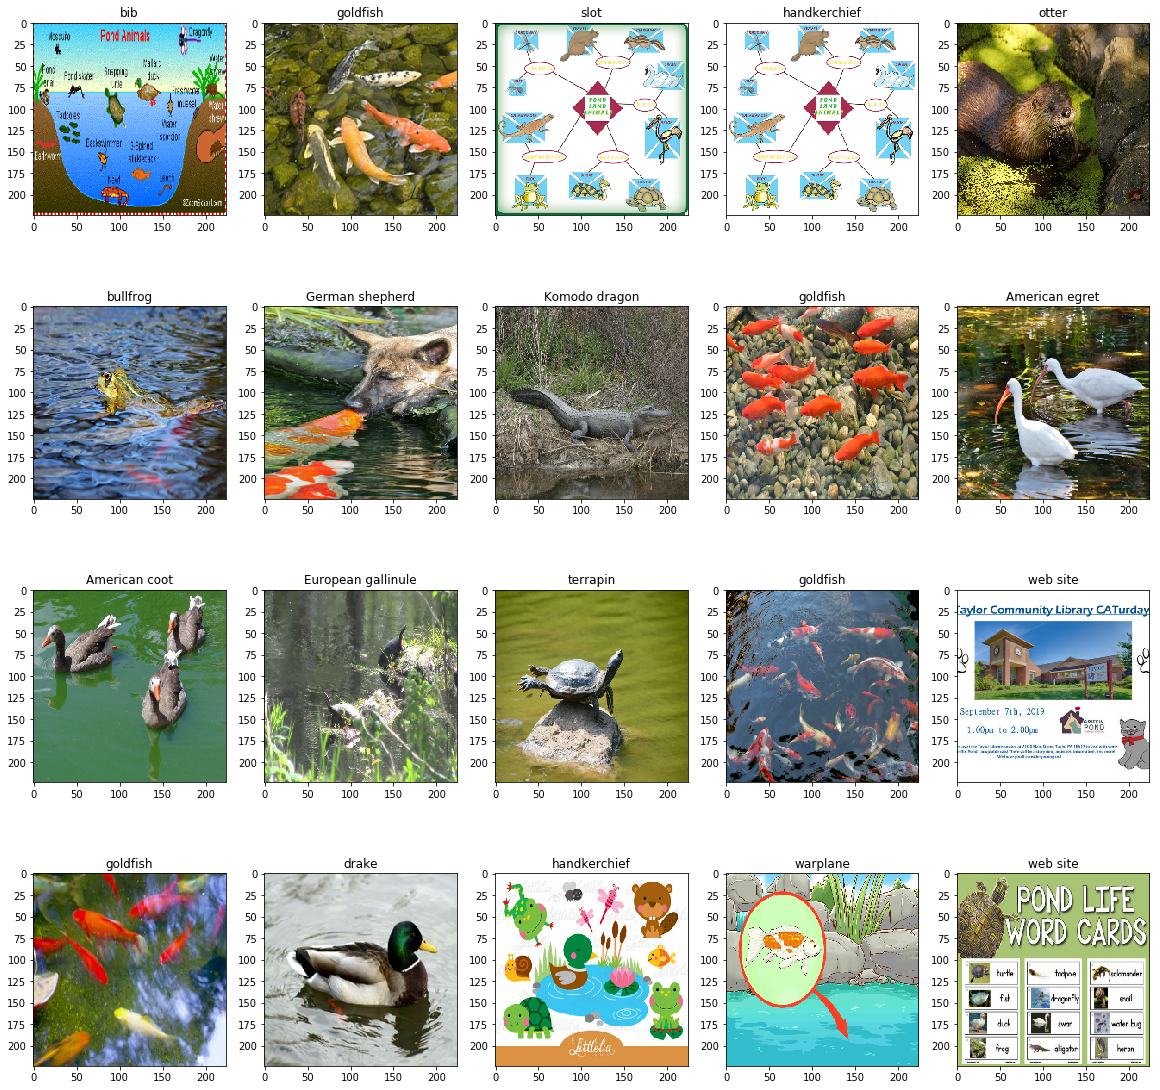

In [0]:
target_map = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt').content

lookup = [target.strip(r'"') for target in str(target_map).split('\\n')]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    codes = []
    for i in range(20):
        codes.append(np.argmax(logits[i]))               
             
cols = 5
rows = math.ceil(len(images)/5)
fig=plt.figure(figsize=(20, 20))
with tf.Session() as sess:
    for idx,image in enumerate(images):
        fig.add_subplot(rows, cols, idx+1)
        plt.imshow(image.eval())
        plt.title(lookup[codes[idx]])
plt.savefig('animals.jpg', dpi=120)
plt.show()

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [0]:
# TODO - your code!


<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

Autoencoders are commonly used for data denoising. They can also be used for dimensionality reduction, particularly when trying to visualize high-dimensional data that t-SNE stuggles with. In such a case, an autoencoder can be used as a preprocessing step, and its output representation can be used by t-SNE to visualize the data in a 2D space

Variational autoencoders are also an important part of generative modeling approaches.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
I consider my strongest area to be descriptive statistics.

- What area of Data Science would you most like to learn more about, and why?
I would like to learn more about advanced techniques in predictive modeling (regression, trees, gradient boosting), because that is the type of work I'd like to do in my first job.

- Where do you think Data Science will be in 5 years?
I think data science will have a department in most companies, and will be on its way to developing past the hype into a more well understood part of industry.

- What are the threats posed by AI to our society?
Automation is a major threat, since it will put millions of workers out of jobs. These workers lives are already precarious, and the United States in particular has a woefully inadequate social safety net. We need to make sure that the gains from AI don't just accrue to the handful of billionaires who already have more wealth and power than anyone in the history of the human race.

- How do you think we can counteract those threats? 
We can institute a universal basic income, and transfer ownership and control of the means of production to the workers.

- Do you think achieving General Artifical Intelligence is ever possible?

Possibly, it depends how you define it. With the deep learning revolution it seems like most tasks that humans can do (reading, playing games, writing, locomotion) are within the grasp of machines. There may be reason to believe that neural network based AI won't be fundamentally incapable of surmounting the so-called "frame problem" that plagued rule-based approaches (although GPT-2 talking about underwater fire might be cause for pessimism on this).

One issue that I'm struck by, however, is the worry that AI is just shunting symbols around, and that these symbols have no real connection to the world for the AI. When I talk or think about my car, my words/thoughts have "aboutness." I'm referring to a particular artifact in the world, one that I have a history of interacting with in various ways. I've sat in my car, driven it around, been frustrated that the AC isn't particularly cold, etc... 

For this reason I wonder if having a physical body and a certain form of life is essential to having a true understanding of the words and concepts in human languages.

That said, an AI could exhibit perfectly intelligent behavior without really understanding and without being conscious. Also, I suspect that "understand" is being used by different people in different ways when they have disagreements about whether, for example, the Chinese room "understands." So to really make progress on those disputes you'd have to provide a clear definition, or declare it to be a defective concept and go about engineering replacement concepts that can do the work that you wanted UNDERSTAND to do in the first place.


A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")